# Classification of WHO Situation Report Data

**Universidade do Porto** 

**Faculdade de Engenharia**

**Integrated Masters in Informatics and Computting Engineering**

**Artificial Intelligence (IART)**


Work by:
- Hugo Daniel Gonçalves Fernandes, up201909576
- Ricardo Fontoura de Aguiar Pinto, up201909580
- João Miguel dos Santos de Lima Monteiro, up201705580

***Abstract - This article encompases the exploritory analysis, data adjusting, modeling and classification of data from situiation reports of the WHO about the ongoing COVID-19 pandemic. As well as comparisons between the performances of algorithms used in the modeling process***


## 1. Introduction

## 2. Description of the dataset

### Base Dataset

The dataframe being utilized features data from the WHO situation reports from 2020-01-22 to 2020-05-21 (currently) for 188 different countries. Each entry in this data is comprised of the following variables:

- **Province/State**: Specifies which state or province of a specific country the data in the entry belongs to.
- **Country/Region**: Country or region of where the data is from.
- **Lat**: Latitude of the specific Country or Province. 
- **Long**: Longitude of the specific Country or Province.
- **Date**: Date of the day the situation report this entry is from was written.
- **Confirmed**: Number of total confirmed COVID-19 cases up to and including the day of the entry.
- **Deaths**: Number of total deaths of confirmed cases up to and including the day of the entry.
- **Recovered**: Number of total patients that had the virus and recovered up to and including the day of the entry.


This data, while very useful for analysis of the overall COVID-19 pandemic that is unfolding, does not provide any varible that we could model an algorithm to classify. Which means we will have to create a dependent variable for classification. Also we will create other variables calculated from the present data, this is to offset the fact that, although the data tells us a lot of information, an algorithm trying to establish a model of classification might have issues drawing the propper coorelations between the variables presented.

#### Importing the Dataset

Using the *Pandas* python library we import the data from the original *.csv*, and display a portion of the dataset created:

In [1]:
import pandas as pd
imported_df = pd.read_csv('Data/covid_19_clean_complete.csv')
display(imported_df)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
32060,NaN,Sao Tome and Principe,0.186360,6.613081,5/21/20,251,8,4
32061,NaN,Yemen,15.552727,48.516388,5/21/20,197,33,0
32062,NaN,Comoros,-11.645500,43.333300,5/21/20,34,1,8
32063,NaN,Tajikistan,38.861034,71.276093,5/21/20,2350,44,0


#### Verifying the absence of nulls

In [2]:
imported_df.isnull().sum()


Province/State    22385
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

### Changes to existing variables

Some variables in the original data arent in the ideal format (Date) or due to the complexity they introduced were removed and the over all data ajusted to fill their absence (Province/State).

#### Date

We proceeded to change the format the date is presented in from a regular MM/DD/YY to a counter, from the first day recorded in the dataset 22-01-2020 onwards, this counter starts as 0 and at the moment progresses up to 120 days after the first one  this change was implemented due to previous problems utilizing date formats as components of a model creating algorithm in previous classes. 

In [3]:
imported_df['Date'] = pd.to_datetime(imported_df['Date'])
x = pd.to_datetime('2020-01-22')
imported_df['Day'] = (imported_df['Date'] - x).dt.days
del imported_df['Date']
display(imported_df)

,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Day
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0
...,...,...,...,...,...,...,...,...
32060,NaN,Sao Tome and Principe,0.186360,6.613081,251,8,4,120
32061,NaN,Yemen,15.552727,48.516388,197,33,0,120
32062,NaN,Comoros,-11.645500,43.333300,34,1,8,120
32063,NaN,Tajikistan,38.861034,71.276093,2350,44,0,120


#### Province/State

We decided to remove this particular column and combine all the data from a country into one entry per day, not only to reduce the ammount of rows in the dataset, but also because many of these states and provinces had very small numbers of infected, which made us believe that classifying the overall country wide situation would be more valuable.

In [4]:
del imported_df['Province/State']
new_df = imported_df.groupby(['Country/Region','Day']).agg({'Lat': 'first', 'Long': 'first', 'Confirmed': 'sum',
'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered
0,Afghanistan,0,33.0,65.0,0,0,0
1,Afghanistan,1,33.0,65.0,0,0,0
2,Afghanistan,2,33.0,65.0,0,0,0
3,Afghanistan,3,33.0,65.0,0,0,0
4,Afghanistan,4,33.0,65.0,0,0,0
...,...,...,...,...,...,...,...
22743,Zimbabwe,116,-20.0,30.0,44,4,17
22744,Zimbabwe,117,-20.0,30.0,46,4,18
22745,Zimbabwe,118,-20.0,30.0,46,4,18
22746,Zimbabwe,119,-20.0,30.0,48,4,18


### New Variables Created

To increase the ammount of data that the algorithms will have to determine if the dependent varible is true or false we created multiple new columns with data calculeted from the original data.

#### Active_Cases 

This variable consists of the number of current active cases in a given day, this number is determined by taking the total number of confirmed cases and subtracting the number of total recovered patients and total deaths.

In [5]:
new_df['Active_Cases'] = new_df['Confirmed'] - (new_df['Deaths']+new_df['Recovered'])
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases
0,Afghanistan,0,33.0,65.0,0,0,0,0
1,Afghanistan,1,33.0,65.0,0,0,0,0
2,Afghanistan,2,33.0,65.0,0,0,0,0
3,Afghanistan,3,33.0,65.0,0,0,0,0
4,Afghanistan,4,33.0,65.0,0,0,0,0
...,...,...,...,...,...,...,...,...
22743,Zimbabwe,116,-20.0,30.0,44,4,17,23
22744,Zimbabwe,117,-20.0,30.0,46,4,18,24
22745,Zimbabwe,118,-20.0,30.0,46,4,18,24
22746,Zimbabwe,119,-20.0,30.0,48,4,18,26


#### Yesterdays_Confirmed_Cases

This variable was created to facilitate the creation of another variable, that compares the number of confirmed cases of the current day with the number of cases of the day before.

In [6]:
new_df['Yesterdays_Confirmed_Cases'] = new_df['Confirmed'].shift()                    
new_df.loc[new_df['Day'] < 1, 'Yesterdays_Confirmed_Cases'] = new_df['Confirmed']
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases
0,Afghanistan,0,33.0,65.0,0,0,0,0,0.0
1,Afghanistan,1,33.0,65.0,0,0,0,0,0.0
2,Afghanistan,2,33.0,65.0,0,0,0,0,0.0
3,Afghanistan,3,33.0,65.0,0,0,0,0,0.0
4,Afghanistan,4,33.0,65.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
22743,Zimbabwe,116,-20.0,30.0,44,4,17,23,42.0
22744,Zimbabwe,117,-20.0,30.0,46,4,18,24,44.0
22745,Zimbabwe,118,-20.0,30.0,46,4,18,24,46.0
22746,Zimbabwe,119,-20.0,30.0,48,4,18,26,46.0


#### Increase_in_Cases

This variable is the aforementioned variable that compares the data in the *Confirmed* column with the data in the *Yesterdays_Confirmed_Cases* column. This varible we believe is highly important not only to set the training test of our dependent variable but also will have a high coorelation with the dependent variable.

In [7]:
new_df['Increase_in_Cases'] = new_df['Confirmed']-new_df['Yesterdays_Confirmed_Cases']
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases
0,Afghanistan,0,33.0,65.0,0,0,0,0,0.0,0.0
1,Afghanistan,1,33.0,65.0,0,0,0,0,0.0,0.0
2,Afghanistan,2,33.0,65.0,0,0,0,0,0.0,0.0
3,Afghanistan,3,33.0,65.0,0,0,0,0,0.0,0.0
4,Afghanistan,4,33.0,65.0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
22743,Zimbabwe,116,-20.0,30.0,44,4,17,23,42.0,2.0
22744,Zimbabwe,117,-20.0,30.0,46,4,18,24,44.0,2.0
22745,Zimbabwe,118,-20.0,30.0,46,4,18,24,46.0,0.0
22746,Zimbabwe,119,-20.0,30.0,48,4,18,26,46.0,2.0


### Dependent Variable for Classification

Due to the previously stated fact that the base dataset has no categorical variable we could use as a dependent variable in a classifcation problem we need to define our own dependent categorical variable.

#### Will_Infection_Ratio_Increase

Named Will_Infection_Ratio_Increase this varible will be the dependent varible of our classification prediction model, this varible indicates if the increase of cases will be larger the following day. This means that for any given entry in the data this varible compares the current day's *Increase_in_Cases* and the following day's *Increase_in_Cases*.
Of course for starters in order to create the models we will have to correctly populate this varible, after the models are created based on the correct dataset we can then run them against the same dataset and determine statistics such as accuracy of predictions among others.

In [8]:
new_df['Will_Infection_Ratio_Increase'] = (new_df['Increase_in_Cases'].shift(-1) - new_df['Increase_in_Cases'] ) > 0                  
new_df.loc[new_df['Day'] < 1, 'Will_Infection_Ratio_Increase'] = True
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases,Will_Infection_Ratio_Increase
0,Afghanistan,0,33.0,65.0,0,0,0,0,0.0,0.0,True
1,Afghanistan,1,33.0,65.0,0,0,0,0,0.0,0.0,False
2,Afghanistan,2,33.0,65.0,0,0,0,0,0.0,0.0,False
3,Afghanistan,3,33.0,65.0,0,0,0,0,0.0,0.0,False
4,Afghanistan,4,33.0,65.0,0,0,0,0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
22743,Zimbabwe,116,-20.0,30.0,44,4,17,23,42.0,2.0,False
22744,Zimbabwe,117,-20.0,30.0,46,4,18,24,44.0,2.0,False
22745,Zimbabwe,118,-20.0,30.0,46,4,18,24,46.0,0.0,True
22746,Zimbabwe,119,-20.0,30.0,48,4,18,26,46.0,2.0,True


### Data filtering

In order to filter out unnecessary data in the dataset we decided to filter out entries we deemed of little value.

#### Removing entries from contries when they have no cases

We decided to remove entries in which contries have 0 confirmed cases mainly for two reasons, first, the ammount of lines this encompases in the dataset is quite substancial, because many contries didnt get their first cases of the virus until months after the start of data collection, second, although it might be said that the empty lines might help the algorithm not consider a country's rise in numbers to be too late in the overall recording period and over compensate by over predicting increases in cases the same can be said for the opposite, keeping the 0 confirmed cases lines might make the algorithm over compensate and slow down predictions of increases. So we decided the best course of acction would be to remove the lines since this type of data an overestimation would be preferable to an underestimation.

In [9]:
new_df = new_df[new_df.Confirmed != 0]
new_df = new_df.reset_index(drop=True)
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases,Will_Infection_Ratio_Increase
0,Afghanistan,33,33.0,65.0,1,0,0,1,0.0,1.0,False
1,Afghanistan,34,33.0,65.0,1,0,0,1,1.0,0.0,False
2,Afghanistan,35,33.0,65.0,1,0,0,1,1.0,0.0,False
3,Afghanistan,36,33.0,65.0,1,0,0,1,1.0,0.0,False
4,Afghanistan,37,33.0,65.0,1,0,0,1,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
14687,Zimbabwe,116,-20.0,30.0,44,4,17,23,42.0,2.0,False
14688,Zimbabwe,117,-20.0,30.0,46,4,18,24,44.0,2.0,False
14689,Zimbabwe,118,-20.0,30.0,46,4,18,24,46.0,0.0,True
14690,Zimbabwe,119,-20.0,30.0,48,4,18,26,46.0,2.0,True


## 3. Approach

In this section we elaborate on the algorithms used, the implementation of said algorithms and basic results that will later be paired with graphs in the experimental evaluation of section 4 to analyse the results.

### Preprocesing

#### Turning Countries and Regions into labeled variables

Scikit learn isn't compatible with using strings as a part of the models, so we must turn the countries and regions into numbers. 

At first we attempted to use OneHotLabel, to identify the countries this however wasn's possible because we have 188 countries this would add 188 columns to each of our over 14 thousand entries. So although not being as correct because the algorithms will consider the countries as numbers that will weigh in on the decicion we think its more appropriate.

In [10]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
contrylabelencoder = LabelEncoder()# Assigning numerical values and storing in another column
new_df['Country/Region'] = contrylabelencoder.fit_transform(new_df['Country/Region'])
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases,Will_Infection_Ratio_Increase
0,0,33,33.0,65.0,1,0,0,1,0.0,1.0,False
1,0,34,33.0,65.0,1,0,0,1,1.0,0.0,False
2,0,35,33.0,65.0,1,0,0,1,1.0,0.0,False
3,0,36,33.0,65.0,1,0,0,1,1.0,0.0,False
4,0,37,33.0,65.0,1,0,0,1,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
14687,187,116,-20.0,30.0,44,4,17,23,42.0,2.0,False
14688,187,117,-20.0,30.0,46,4,18,24,44.0,2.0,False
14689,187,118,-20.0,30.0,46,4,18,24,46.0,0.0,True
14690,187,119,-20.0,30.0,48,4,18,26,46.0,2.0,True


#### Order table entries by day and country

Ordering the entries by day for the creation of the X and y subsets that follow.

In [11]:
new_df = new_df.sort_values(by=['Day','Country/Region'])
new_df = new_df.reset_index(drop=True)
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases,Will_Infection_Ratio_Increase
0,36,0,31.825700,117.226400,548,17,28,503,548.0,0.0,True
1,87,0,36.000000,138.000000,2,0,0,2,2.0,0.0,True
2,156,0,36.000000,128.000000,1,0,0,1,1.0,0.0,True
3,165,0,23.700000,121.000000,1,0,0,1,1.0,0.0,True
4,168,0,15.000000,101.000000,2,0,0,2,2.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
14687,183,120,31.952200,35.233200,423,2,346,75,398.0,25.0,False
14688,184,120,24.215500,-12.885800,6,0,6,0,6.0,0.0,False
14689,185,120,15.552727,48.516388,197,33,0,164,184.0,13.0,False
14690,186,120,-15.416700,28.283300,866,7,302,557,832.0,34.0,False


#### Defining subset X and subset y for the modeling

In the model fitting process we will need a subset that contains all the independent variable columns (X) and a set that contains our dependent variable column (y). These sets will be used to split the data into train sets and test sets later.

In [12]:
X = new_df.drop('Will_Infection_Ratio_Increase',axis = 1)
y = new_df['Will_Infection_Ratio_Increase']
display(X)
display(y)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases
0,36,0,31.825700,117.226400,548,17,28,503,548.0,0.0
1,87,0,36.000000,138.000000,2,0,0,2,2.0,0.0
2,156,0,36.000000,128.000000,1,0,0,1,1.0,0.0
3,165,0,23.700000,121.000000,1,0,0,1,1.0,0.0
4,168,0,15.000000,101.000000,2,0,0,2,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14687,183,120,31.952200,35.233200,423,2,346,75,398.0,25.0
14688,184,120,24.215500,-12.885800,6,0,6,0,6.0,0.0
14689,185,120,15.552727,48.516388,197,33,0,164,184.0,13.0
14690,186,120,-15.416700,28.283300,866,7,302,557,832.0,34.0


0         True
1         True
2         True
3         True
4         True
         ...  
14687    False
14688    False
14689    False
14690    False
14691    False
Name: Will_Infection_Ratio_Increase, Length: 14692, dtype: bool

#### Spliting X and y into train and test sets
After defining the X and y subsets we use them to create more subsets. Train subsets comprised of 80% of the data from which the model will learn and be fited for, and Test subsets comprised of 20% that will be ran through the model and then compared to their intended outcome so that we can evaluate the performance of the model.

In [13]:
from sklearn.model_selection import train_test_split

#split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

#### Scaling the data

Scaling of the data in the dataset is very important when creating models, an algorithm can't see the diference between a time period of 100 days or a number of confirmed cases as high as 200 thousand. This is why data must be scaled. In this particular case we performed a standarddization to the data, which means that it will adjust the values in a way that each column has a mean of 0 and a variance of 1.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Algorithms

For this project we were required to utilize three supervised learning algorithms, for the classification of our dependent variable, and then compare performance metrics (*precision*, *recall*, *accuracy*, *F-measure* and run time) of each algorithm with the others.  We also used *timeit* to get the runtime of each algorithm.

#### Classification Report
The classification report is a funcion of the *skilearn.metricx* library, we print out the details of this report which include: precision, recall, f1-score, support, accuracy, macro average and weighted average.

#### Confusion matrix
The confusion matrix is often used to describe the perfomance of a classification model since it compares the predicted values and the actual values that would be correct, in this way providing the number of correct predictions, false positives, false negatives and wrong predictions.

#### Random Forrest

Random decision forests are a learning method that can be used for classification and regression. The method consists of constructing a multiple of decision trees and, in this case for classification, the predicted outcomu will be the mode of the sugestion of the collective of decision trees.


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import timeit

start_time_RF = timeit.default_timer()

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

elapsed_rf = timeit.default_timer() - start_time_RF

##### Classification report

In [16]:
print(classification_report(y_test,pred_rfc))
print(elapsed_rf, 'seconds')

              precision    recall  f1-score   support

       False       0.68      0.75      0.72      1801
        True       0.54      0.45      0.49      1138

    accuracy                           0.64      2939
   macro avg       0.61      0.60      0.60      2939
weighted avg       0.63      0.64      0.63      2939

5.1924093 seconds


##### Confusion matrix

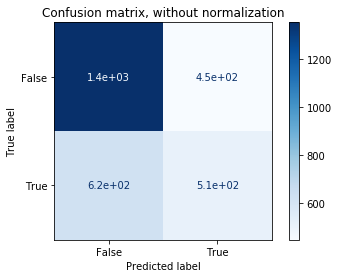

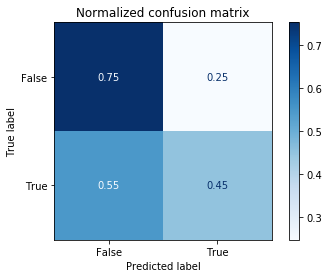

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

class_names = ['False','True']
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

#### Support Vector Machine
SVM is a supervised learning model that creates a model by trying to seperate the data for each label, this can lead to highly inconsistent data being unreliable when using this learning model, the dataset we are using is inconsistent which created problems for this model.

In [18]:
from sklearn.svm import SVC
from sklearn import svm

start_time_SVM = timeit.default_timer()

svmc = svm.SVC()
svmc.fit(X_train,y_train)
pred_svmc = svmc.predict(X_test)

elapsed_svm = timeit.default_timer() - start_time_SVM

##### Classification Report

In [19]:
print(classification_report(y_test,pred_svmc))
print(elapsed_svm, 'seconds')

              precision    recall  f1-score   support

       False       0.61      0.98      0.75      1801
        True       0.44      0.03      0.06      1138

    accuracy                           0.61      2939
   macro avg       0.53      0.50      0.41      2939
weighted avg       0.55      0.61      0.48      2939

5.939019199999999 seconds


##### Confusion Matrix

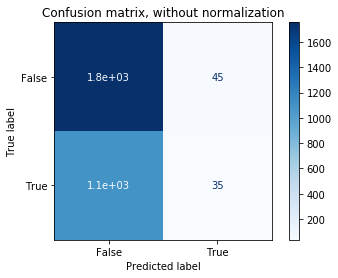

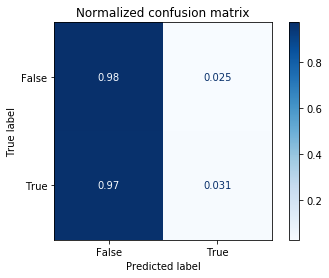

In [20]:
class_names = ['False','True']
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svmc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

#### Neural Network

Neural networs are modeled loosely after the human brain's pattern recongnision. Data is intreperted through vectors of numerical values and the algorithm tries to find numerical patterns.

In [21]:
from sklearn.neural_network import MLPClassifier

start_time_NN = timeit.default_timer()

mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

elapsed_NN = timeit.default_timer() - start_time_NN

##### Classification Report

In [22]:
print(classification_report(y_test,pred_mlpc))
print(elapsed_NN, 'seconds')

              precision    recall  f1-score   support

       False       0.66      0.79      0.72      1801
        True       0.52      0.35      0.42      1138

    accuracy                           0.62      2939
   macro avg       0.59      0.57      0.57      2939
weighted avg       0.60      0.62      0.60      2939

12.4027618 seconds


##### Confusion Matrix

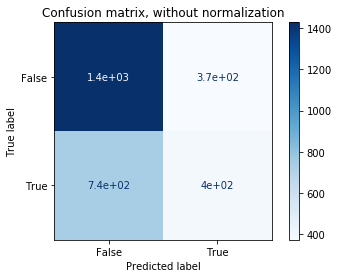

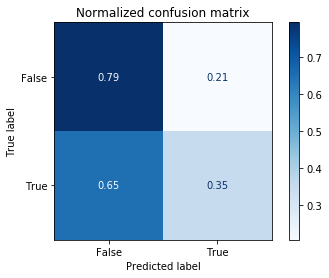

In [23]:
class_names = ['False','True']
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlpc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

#### K-Nearest Neighbour

K-NN is a lazy learning algorithm where the prediction is made by approximating locally we believe this might be the cause of the problems this algorithm's result presents, it fully predicts false for every entry. Because of this we won't compare the results from this algorithm in the next section of the report.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

start_time_knc = timeit.default_timer()
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X, y)
pred_knc = knc.predict(X_test)
elapsed_knc = timeit.default_timer() - start_time_knc

##### Classification Report

In [25]:
display(pred_knc)
print(classification_report(y_test,pred_knc,zero_division = 0))
print(elapsed_knc, 'seconds')

array([False, False, False, ..., False, False, False])

              precision    recall  f1-score   support

       False       0.61      1.00      0.76      1801
        True       0.00      0.00      0.00      1138

    accuracy                           0.61      2939
   macro avg       0.31      0.50      0.38      2939
weighted avg       0.38      0.61      0.47      2939

0.255666999999999 seconds


##### Confusion Matrix

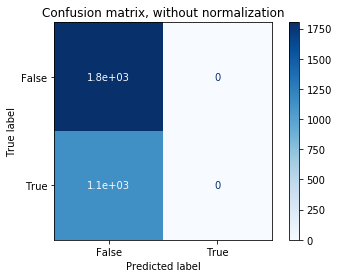

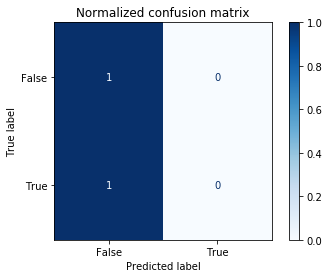

In [26]:
class_names = ['False','True']
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

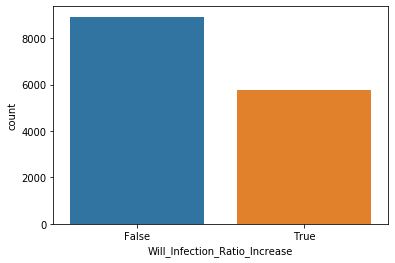

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.countplot(new_df['Will_Infection_Ratio_Increase'])

In [28]:
#CODE SNIPPETS

### Sort data by day (IGNOREM ISTO JOAO E RICARDO)
#new_df = new_df.sort_values(by=['Day','Country/Region'])
#new_df = new_df.reset_index(drop=True)

#display(new_df)
##pd.set_option('display.max_rows', 40000)
#display(new_df.loc[new_df['Country/Region'] == 'US'])

## 4. Experimental evaluation (in which you should include any plots and tables with your results)

### Compare algorithm performance metrics

#### *Precision*
#### *Recall*
#### *Accuracy* 
#### *F-measure*
#### Run time

## 5. Conclusions

## References ADD LINKS

- [Original Dataset Kaggle Page](https://www.kaggle.com/imdevskp/corona-virus-report)
- [Scikit-Learn Tutorial](https://www.youtube.com/watch?time_continue=4&v=0Lt9w-BxKFQ&feature=emb_logo)
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
- [Data Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)
- [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Random Forest](https://en.wikipedia.org/wiki/Random_forest)
- [Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine)
- [Neural Networks](https://pathmind.com/wiki/neural-network)
- [K-Nearest Neighbours](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)